<a href="https://colab.research.google.com/github/matteoalberti/Lectures_machinelearningbasics_nomath/blob/master/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome!**

## Introduction to Machine Learning



## **Lecturer :** Matteo Alberti

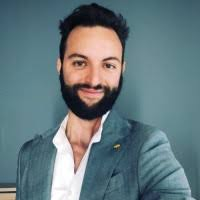

*Contacts :* https://www.linkedin.com/in/matteo-alberti-170493/


## Introduction to Supervised and Unsupervised Machine Learning

![](https://www.diegocalvo.es/wp-content/uploads/2018/09/machine-learning-classification.png)


## Introduction to Linear and Logistic Regression Problem

***Don't worry.. this will be the only formula that we'll use today***

$y=f(x)$

technically :

$y=a + b*X + e$

The model is defined in terms of parameters called coefficients (beta), where there is one coefficient per input and an additional coefficient that provides the intercept or bias.

For example, a problem with inputs X with m variables x1, x2, …, xm will have coefficients beta1, beta2, …, betam and beta0. A given input is predicted as the weighted sum of the inputs for the example and the coefficients.

$yhat = alfa + beta_1 * x_1 + beta_2 * x_2 + … + beta_p * x_p + error$

## An example of linear regression

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)

## what do we minimize?

![](https://www.statisticshowto.com/wp-content/uploads/2015/03/residual.png)

## When don't we have a linear relationship between variables?

![](https://i.stack.imgur.com/uB7pm.png)



### Models too simple or too complex?

![](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

### Load Packages

In [5]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## From zero to Linear Regression 

- Data Loading

- Data Preparation

- Understand the task! Supervised, Unsupervised Learning?

- Assumptions & Models

- Metrics and Evaluation

- Test yourself!



## First Exapled (GUIDED!)



### Boston house dataset

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000$$
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

### Translated

- CRIM: tasso di criminalità pro capite per città
- ZN: Proporzione di terreno residenziale suddiviso in zone per lotti superiori a 25.000 piedi quadrati
- INDUS: proporzione di acri di attività commerciali non al dettaglio per città
- CHAS: variabile fittizia Charles River (= 1 se il tratto confina con il fiume; 0 altrimenti)
- NOX: concentrazione di ossido nitrico (parti per 10 milioni)
- RM: numero medio di stanze per abitazione
- ETÀ: Proporzione di unità abitate dai proprietari costruite prima del 1940
- DIS: distanze ponderate da cinque centri per l'impiego di Boston
- RAD: Indice di accessibilità alle autostrade radiali
- TASSA: aliquota dell'imposta sulla proprietà a valore intero per 10.000 $$
- PTRATIO: rapporto alunni-insegnanti per città
- B: 1000 (Bk - 0.63) ², dove Bk è la proporzione di [persone di discendenza afroamericana] per città
- LSTAT: percentuale di status inferiore della popolazione
- MEDV: valore medio delle case occupate dai proprietari in $ 1000

In [25]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [26]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Which is the shape of our data?

In [27]:
# What about the target?

### Data Preprocessing

***what should I check about my data?***


In [56]:
# There are any missing values? Look dropna function!


## EDA and Assumptions

- When we use parametetric statistical models


In [56]:

# What is EDA? Exploratory Data Analysis, in this case : looking for the relationship of the target variable with other features.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

*What Should I see from this plot??*

- Data distribution!


### Normal Distribution

In [56]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

There are many other distributions...

*Poisson, Binomial, Trinomial, Gamma, Exponential, Bernulli, . . . .*

**But what does it mean converge into a distribution?**

In [56]:
# Bernulli Example

# A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure)  | TESTA O CROCE!

from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10,p=0.5)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')



Come back to our Boston Data set!


***How can I check if normality is satisfied?***

- Graphical tests
- Shapiro Wilk test



In [56]:
from statsmodels.graphics.gofplots import qqplot

qqplot(boston['MEDV'], line='s')
plt.show()

### Which are our Outliers?

In [57]:
## Suggestion! But consider that creativity is your best tool!


#### When you finish you can test with the above functions or use the a no-grafical test

In [57]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(boston['MEDV'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

## Multi-collinearity

Multicollinearity happens when independent variables in the regression model are highly correlated to each other. It makes it hard for interpretation of model and also creates overfitting problem.

**But the main problem is the following :**

- When independent variables are highly correlated, change in one variable would cause change to another and so the model results fluctuate significantly.


### Correlation Matrix

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.


In [57]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

*Which is the Correlation Matrix range?*

- from :
- to :


*Which features will we select?*

*Multi-Collinearity?*


## Homoschedasticity

![](https://miro.medium.com/max/700/1*V-ZwpBFum-jP710q_fyjBA.png)

- Often occurs in those data sets which have a large range between the largest and the smallest observed values i.e. when there are outliers.
- When model is not correctly specified.
- If observations are mixed with different measures of scale.
- When incorrect transformation of data is used to perform the regression.
Skewness in the distribution of a regressor, and may be some other sources.

### Show the final Dataframe with all the selected columns

In [37]:
# select by name df=[[]] | select by .iloc func



boston.head()

## Data Splitting

There are lots of ways to split our data and lots of packages

- Divided manually
- build-in function inside sklearn
  - train_test_val
  - . . . 


And also depend on data type / dataset size


In [39]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(boston[boston.columns[:-1]], boston[boston.columns[-1:]], train_size=0.65,test_size=0.35, random_state=101)

In [57]:
print ("Original: ", boston.shape, "\n")

print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)

print("X_test: ", X_test.shape)
print ("y_test: {} \n ".format(y_test.shape))

print ("Reconstruct X : ", X_train.shape[0] + X_test.shape[0])

# Check also Y

### K-fold cross-validation

![](https://static.packt-cdn.com/products/9781789617740/graphics/b04c27c5-7e3f-428a-9aa6-bb3ebcd3584c.png)

## Model Definition & Traning

In [47]:
from sklearn.linear_model import LinearRegression

%%time

# Fitting the model
boston_model = LinearRegression()
boston_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
### How do I evaluate my model?  P.s. look at .score funcion ok sklearn!

# Returning the R^2 for the model
boston_r2 = boston_model.score(X_test, y_test)
print('R^2: {0}'.format(boston_r2))

### We have lots of metrics of evaluation 

*Let me show you the most relevant*

- Mean Squared Error**(MSE)**        

$$ MSE = \frac {\sum (y - y_{hat})^2}{N} $$

it penalizes even a small error which leads to over-estimation of how bad the model is

- Root-Mean-Squared-Error**(RMSE)**

$$ RMSE = \sqrt \frac {\sum (y - y_{hat})^2}{N} $$

This implies that RMSE is useful when large errors are undesired.

- Mean-Absolute-Error**(MAE)**

$$ MSE = \frac {\sum |y - y_{hat}|}{N} $$

The MAE is more robust to outliers and does not penalize the errors as extremely as mse




- **R²** or Coefficient of Determination.

*Question :* which is the range of $R^2$? Why?

- **Adjusted R²**

As $R^2$ but penalize too variables

## Question from your manager : Which features are the most relevant?


In [58]:
importance = boston_model.coef_  ## What is .coef???
# summarize feature importance
for i,v in enumerate(importance[0]):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show()

## Now.. Try to predict!

# BREAK!!

Do yourself on another dataset!

**Need a suggest?**

- Try with : **load_diabetes**
- Try with : **Kaggle**  : www.kaggle.com



Do you want any good reference for learning in easy and good way?

- https://machinelearningmastery.com/

# Or we can make it a bit more complex!

In [ ]:
df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

df_flights.head()

## Repeat the above steps and answer to this :

- how many years do we have? which function did you use?
- can you make a pie or a bar plot?
- missing values BY column 
  - How did you managed? 

- Linear Regression with all variables! Predict the expected arrived delay!
  - Which is the main problem?
  - Which score did you use?
  - Explain your results